In [ ]:
import pandas as pd

X = pd.read_csv('/content/customer_segmentation.csv')

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2216 non-null   int64  
 1   Education            2216 non-null   int64  
 2   Marital_Status       2216 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2216 non-null   int64  
 5   Teenhome             2216 non-null   int64  
 6   Recency              2216 non-null   int64  
 7   MntWines             2216 non-null   int64  
 8   MntFruits            2216 non-null   int64  
 9   MntMeatProducts      2216 non-null   int64  
 10  MntFishProducts      2216 non-null   int64  
 11  MntSweetProducts     2216 non-null   int64  
 12  MntGoldProds         2216 non-null   int64  
 13  NumDealsPurchases    2216 non-null   int64  
 14  NumWebPurchases      2216 non-null   int64  
 15  NumCatalogPurchases  2216 non-null   i

In [ ]:
X.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
X['Education'].replace(['Graduation','PhD','Basic','Master', '2n Cycle'],[0,1,2,3,4], inplace=True)

In [ ]:
X['Marital_Status'].replace(['Single','Together','Married','Divorced','Widow'],[0,1,2,3,4], inplace=True)

In [ ]:
# Daftar kolom yang ingin dihapus
kolom_yang_dihapus = ['ID', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Response', 'Complain']

# Menghapus kolom
X = X.drop(columns=kolom_yang_dihapus)

In [ ]:
X.dropna(inplace=True)
X.head()

,year birth,education,marital status,income,kidhome,teenhome,recency,mnt wines,mnt frits,mnt meat products,mnt fish products,mnt sweet products,mnt gold prods,num deals purchases,num web purchases,num catalog purchases,num store purchases,num web visits month
0,1957,0,0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,1954,0,0,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,1965,0,1,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,1984,0,1,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,1981,1,2,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5


In [ ]:
kolom_yang_dihapus = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']

# Menggunakan fungsi drop() untuk menghapus kolom-kolom tersebut
X = X.drop(columns=kolom_yang_dihapus)

In [ ]:
# Mengganti nama kolom-kolom
X = X.rename(columns={
    'Year_Birth': 'year birth',
    'Education': 'education',
    'Marital_Status': 'marital status',
    'Income': 'income',
    'Kidhome': 'kidhome',
    'Teenhome': 'teenhome',
    'Recency': 'recency',
    'MntWines': 'mnt wines',
    'MntFruits': 'mnt frits',
    'MntMeatProducts': 'mnt meat products',
    'MntFishProducts': 'mnt fish products',
    'MntSweetProducts': 'mnt sweet products',
    'MntGoldProds': 'mnt gold prods',
    'NumDealsPurchases': 'num deals purchases',
    'NumWebPurchases': 'num web purchases',
    'NumCatalogPurchases': 'num catalog purchases',
    'NumStorePurchases': 'num store purchases',
    'NumWebVisitsMonth': 'num web visits month'})




In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Membuat list yang berisi inersia
clusters = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X)
    clusters.append(km.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
X['marital status'].replace(['Single','Together','Married','Divorced','Widow','Alone','Absurd','YOLO'],[0,1,2,3,4,5,6,7], inplace=True)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year birth             2216 non-null   int64  
 1   education              2216 non-null   int64  
 2   marital status         2216 non-null   int64  
 3   income                 2216 non-null   float64
 4   kidhome                2216 non-null   int64  
 5   teenhome               2216 non-null   int64  
 6   recency                2216 non-null   int64  
 7   mnt wines              2216 non-null   int64  
 8   mnt frits              2216 non-null   int64  
 9   mnt meat products      2216 non-null   int64  
 10  mnt fish products      2216 non-null   int64  
 11  mnt sweet products     2216 non-null   int64  
 12  mnt gold prods         2216 non-null   int64  
 13  num deals purchases    2216 non-null   int64  
 14  num web purchases      2216 non-null   int64  
 15  num 

Text(0.5, 1.0, 'Elbow Method untuk Menentukan Jumlah Cluster Optimal')

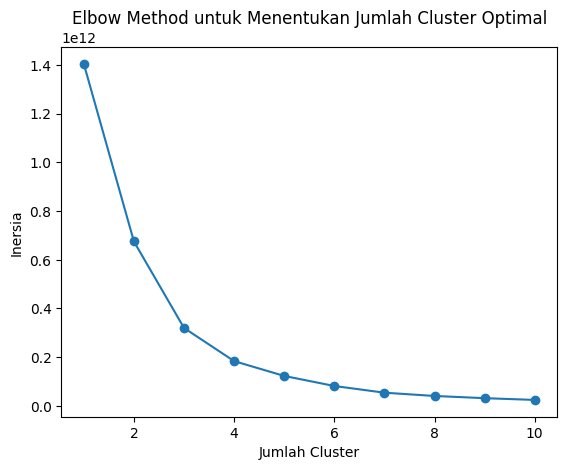

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# Plot nilai inersia

plt.plot(range(1, 11), clusters, marker='o')
plt.xlabel('Jumlah Cluster')
plt.ylabel('Inersia')
plt.title('Elbow Method untuk Menentukan Jumlah Cluster Optimal')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


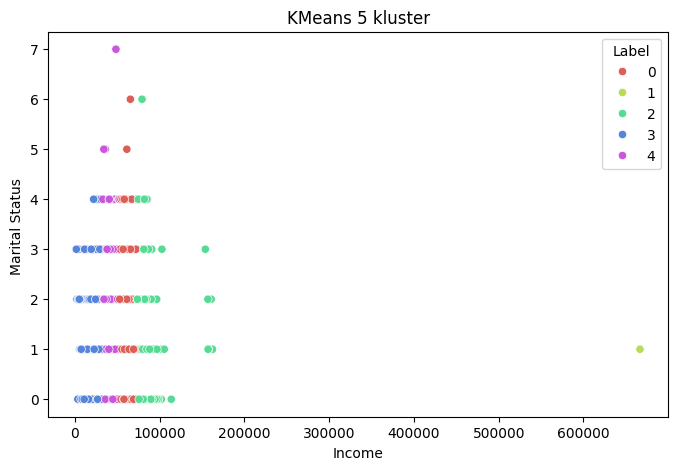

In [ ]:
# Membuat model KMeans dengan 5 klaster
kmeans = KMeans(n_clusters=5)
kmeans.fit(X[['income', 'marital status']])

# Tambahkan kolom label pada dataset
X['Label'] = kmeans.labels_

# Buat plot kmeans dengan klaster 5
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X['income'], y=X['marital status'], hue=X['Label'], palette=sns.color_palette('hls', 5))
plt.title('KMeans 5 kluster')
plt.xlabel('Income')
plt.ylabel('Marital Status ')
plt.show()
